# Project: cleanning - [candy data]
### In this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- Importing packages and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', False)
pd.set_option('display.max_rows', None)

df = pd.read_excel("/kaggle/input/candy-data/candyhierarchy2017.xlsx")
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

# 2- Some general properties of the data 

In [2]:
df.shape

(2460, 120)

In [3]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [4]:
df.describe(include=['O'])

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,...,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,"Click Coordinates (x, y)"
count,2350,2419,2376,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,...,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,911,717,386,1716,9,1735,1605
unique,2,4,106,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,867,685,385,2,1,2,952
top,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,...,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,Almond Joy,Trump,nom nom nom!,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,"(77, 24)"
freq,2038,1467,92,699,132,873,1089,1559,793,857,715,670,1179,1625,1177,820,743,1325,953,1439,1040,644,761,592,1406,1433,664,1176,676,1176,703,708,742,1462,748,907,855,1069,1105,896,...,725,1085,1076,649,1480,1498,1136,706,1151,1151,829,729,605,1399,770,1140,853,783,754,763,613,754,1252,1058,1320,836,1413,1146,723,840,1455,1289,1105,10,7,2,1081,9,1091,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [7]:
df.duplicated().any()

False

# 3- Summary
- The data is so messy and needs a lot of cleaning, we have a lot of missing values, we must change columns' names for easeness, we need to correct some types of variables, the data doesn't have any duplicated values.

<a id = Cleaning></a>
# Cleaning

### 4- Drop all the useless columns and  rows with too much NaN , 

In [8]:
df.drop(['Unnamed: 113', 'Internal ID', 'Q9: OTHER COMMENTS', 'Click Coordinates (x, y)', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER', ], axis='columns', inplace = True)

In [9]:
new_names = {'Q1: GOING OUT?': 'going out', 'Q2: GENDER':'sex', 'Q3: AGE': 'age', \
    'Q4: COUNTRY': 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC': 'state', \
    'Q10: DRESS':'dress', 'Q11: DAY':'day', 'Q12: MEDIA [Daily Dish]':'daily dish',\
        'Q12: MEDIA [Science]':'science', 'Q12: MEDIA [ESPN]':'espn', 'Q12: MEDIA [Yahoo]':'yahoo'}
df.rename(columns=new_names, inplace=True)

In [10]:
df.head()

,going out,sex,age,country,state,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,...,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,dress,day,daily dish,science,espn,yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,...,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN


### 5 - `going out` column 

In [11]:
df['going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [12]:
df['going out'].fillna('Maybe', inplace=True)
print(df['going out'].unique())
df['going out'].value_counts() / df.shape[0] * 100

['Maybe' 'No' 'Yes']


going out
No       82.845528
Yes      12.682927
Maybe     4.471545
Name: count, dtype: float64

### 6 - ` sex` column 

In [13]:
df['sex'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [14]:
df['sex'].fillna("Didn't say", inplace=True)
df['sex'].replace("I'd rather not say", "Didn't say", inplace=True)
df['sex'].replace("Other", "Didn't say", inplace=True)

print(df['sex'].unique())
df['sex'].value_counts() / df.shape[0] * 100

["Didn't say" 'Male' 'Female']


sex
Male          59.634146
Female        34.105691
Didn't say     6.260163
Name: count, dtype: float64

### 7 - ` age` column 

In [15]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [16]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(np.nan, inplace=True)

df['age'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

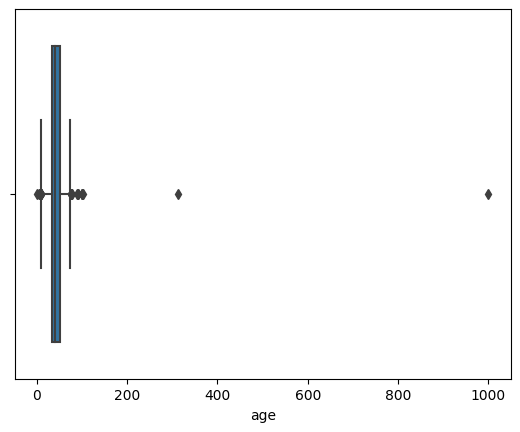

In [17]:
sns.boxplot(x=df['age'])

In [18]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df['age'] = df['age'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [19]:
df['age'].isnull().sum()

135

In [20]:
df['age'].fillna(df['age'].median(), inplace=True)
df['age'] = df['age'].astype(int)

<Axes: xlabel='age'>

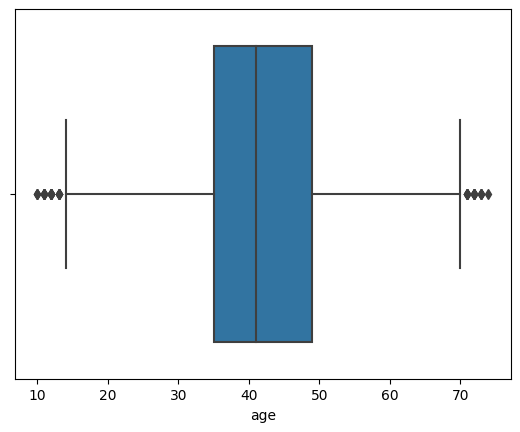

In [21]:
sns.boxplot(x = df['age'])

<Axes: xlabel='age', ylabel='Density'>

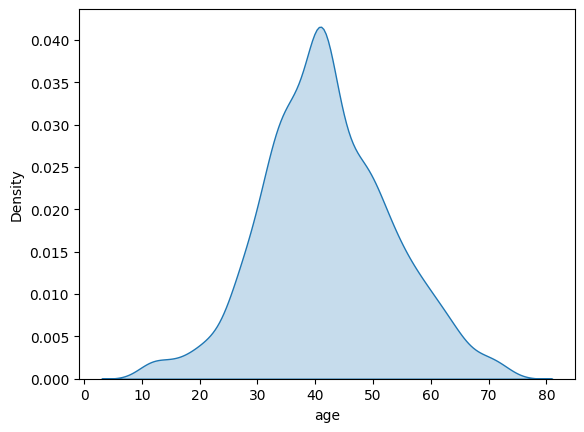

In [22]:
sns.kdeplot(df['age'], shade=True)

In [23]:
print(df['age'].isnull().sum().any())
df['age'].dtype


False


dtype('int64')

### 8 - ` country` column

In [24]:
df['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [25]:
from fuzzywuzzy import process

val_countries = ['usa', 'united states', 'united states of america', 'america', 'uk', 'england', 'united kingdom', \
    'japan', 'canada', 'france', 'germany', 'spain', 'australia', 'sweden', 'switzerland', 'netherlands', 'norway']

df['country'] = df['country'].str.lower()
for country in val_countries:
        matches = process.extract(country, df['country'], limit=df.shape[0])
        for sub in matches:
            if sub[1] >= 80:
                df.loc[df['country'] == sub[0], 'country'] = country

In [26]:
df['country'].unique()

array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae', 'england',
       'mexico', 'u.s.a.', 'france', 'finland', 'north carolina ',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'ireland', 'korea', 'california', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'scotland ', 'south korea', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'ireland ', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [27]:
true_countries = {'america': 'usa', 'murica':'usa', 'u.s.a.':'usa', 'england':'uk', 'new york': 'usa', 'north carolina': 'usa', 'cascadia':'usa', \
    'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'canae':'canada', 'california':'usa', 'ud':'uk', 'new jersey':'usa', 'soviet canuckistan':'canada', \
        'murrika':'usa', 'u s a':'usa', 'hong kong': 'china'}

df['country'].replace(true_countries, inplace=True)
df.value_counts('country') / df.shape[0] * 100

country
usa                               83.821138
canada                             9.268293
uk                                 0.894309
germany                            0.406504
australia                          0.284553
netherlands                        0.284553
japan                              0.203252
china                              0.162602
mexico                             0.162602
scotland                           0.162602
france                             0.121951
switzerland                        0.121951
ireland                            0.121951
sweden                             0.081301
denmark                            0.081301
spain                              0.040650
singapore                          0.040650
south africa                       0.040650
south korea                        0.040650
earth                              0.040650
subscribe to dm4uz3 on youtube     0.040650
taiwan                             0.040650
trumpistan              

In [28]:
last_countries = ['usa', 'canada', 'uk', 'germany', 'australia', 'netherlands', 'japan',\
    'china', 'mexico', 'scotland', 'france', 'switzerland', 'ireland']

df['country'] = df['country'].apply(lambda x: x if x in last_countries else 'other')
df['country'].value_counts() / df.shape[0] * 100


country
usa            83.821138
canada          9.268293
other           3.983740
uk              0.894309
germany         0.406504
netherlands     0.284553
australia       0.284553
japan           0.203252
mexico          0.162602
scotland        0.162602
china           0.162602
france          0.121951
ireland         0.121951
switzerland     0.121951
Name: count, dtype: float64

### 9 - ` state` column

In [29]:
df['state'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [30]:
#We have a lot of state names, so we can drop it off.
df.drop('state', axis='columns', inplace=True)

### 10 - ` Q6` columns

In [31]:
for col in df.columns:
    if col.startswith('Q6'):
        df[col].fillna('Unknown', inplace=True)

In [32]:
for col in df.columns[4:-6]:
    df.rename(columns={col: col[5:]}, inplace=True)

### 11 - ` dress` column

In [33]:
df['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [34]:
df['dress'].fillna('Other', inplace=True)

### 12 - ` day` column

In [35]:
df['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [36]:
df['day'].fillna('Other', inplace=True)

In [37]:
df.isnull().sum()[df.isnull().sum() > 0]

daily dish    2375
science       1098
espn          2361
yahoo         2393
dtype: int64

In [38]:
for col in df.columns[-4:]:
    df[col].fillna(0, inplace=True)

In [39]:
df['No page'] = (df['daily dish'] + df['science'] + df['espn'] + df['yahoo']).apply(lambda x: 1 if x == 0 else 0)

In [40]:
for col in df.columns[-5:]:
    df[col] = df[col].astype(int)
    print(df[col].value_counts(normalize=True) * 100, '\n')

daily dish
0    96.544715
1     3.455285
Name: proportion, dtype: float64 

science
1    55.365854
0    44.634146
Name: proportion, dtype: float64 

espn
0    95.97561
1     4.02439
Name: proportion, dtype: float64 

yahoo
0    97.276423
1     2.723577
Name: proportion, dtype: float64 

No page
0    65.569106
1    34.430894
Name: proportion, dtype: float64 



### 13 - Final check

In [41]:
check = pd.DataFrame({"Type": df.dtypes, "Null": [df[col].isnull().sum() for col in df.columns]})
check

,Type,Null
going out,object,0
sex,object,0
age,int64,0
country,object,0
100 Grand Bar,object,0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),object,0
Any full-sized candy bar,object,0
Black Jacks,object,0
Bonkers (the candy),object,0
Bonkers (the board game),object,0


In [42]:
des = df.describe(include=['O'])
des

,going out,sex,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),...,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
count,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,...,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460
unique,3,3,14,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3
top,No,Male,usa,JOY,DESPAIR,JOY,Unknown,Unknown,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,Unknown,DESPAIR,Unknown,DESPAIR,DESPAIR,Unknown,JOY,Unknown,DESPAIR,MEH,Unknown,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,...,JOY,JOY,DESPAIR,JOY,JOY,Unknown,DESPAIR,DESPAIR,Unknown,DESPAIR,JOY,JOY,Unknown,JOY,DESPAIR,JOY,JOY,Unknown,JOY,JOY,DESPAIR,JOY,JOY,JOY,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,Unknown,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
freq,2038,1467,2062,873,1089,1559,958,992,1006,765,1179,1625,1177,820,743,1325,953,1439,1040,946,761,853,1406,1433,729,1176,823,1176,703,879,742,1462,748,907,855,1069,1105,896,834,889,...,904,857,805,769,1188,817,1085,1076,722,1480,1498,1136,1014,1151,1151,829,729,901,1399,770,1140,853,783,754,1002,917,754,1252,1058,1320,836,1413,1146,789,840,1455,1289,1105,1081,1091


These are the 10 most loved chocolates:


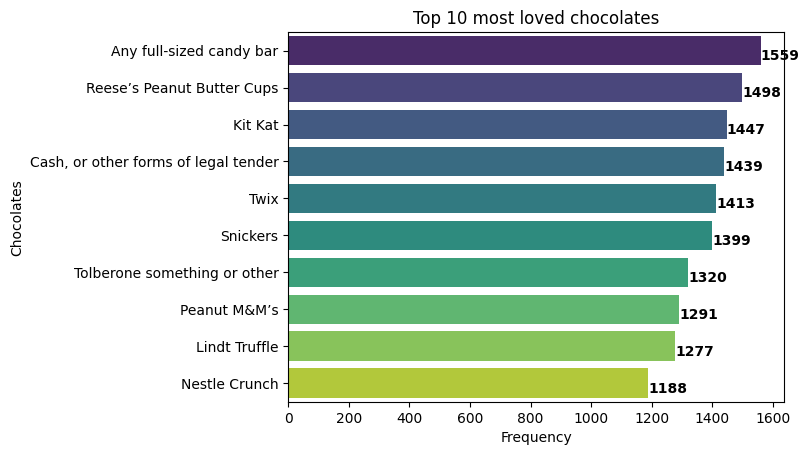

In [43]:
des_2 = des.iloc[[2, 3], 3:-2].T
print("These are the 10 most loved chocolates:")
top_joy = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "JOY"].head(10)


ax = sns.barplot(y = top_joy.index, x = 'freq', palette = 'viridis', data=top_joy)
for i, v in enumerate(top_joy['freq']):
    ax.text(v + 1, i + .25, str(round(v, 2)), color='black', fontweight='bold')
plt.title("Top 10 most loved chocolates")
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()


These are the 10 most hated chocolates:


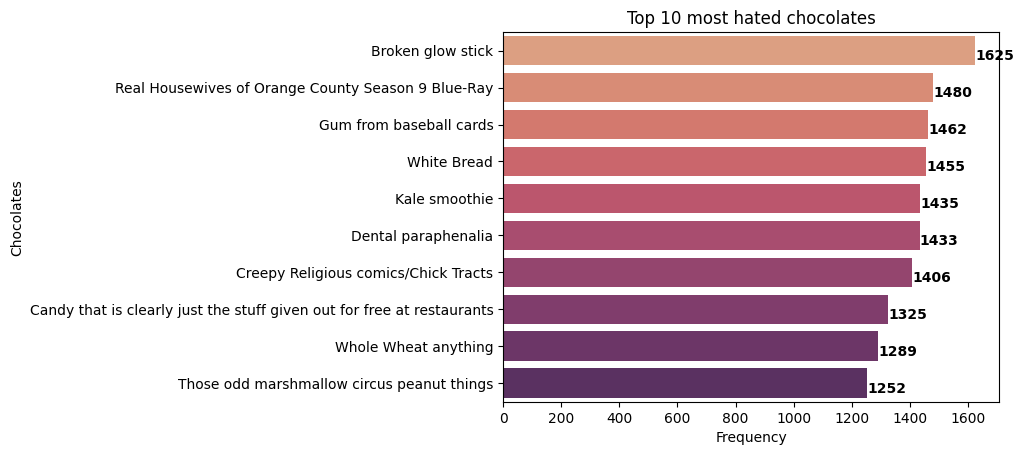

In [44]:
print("These are the 10 most hated chocolates:")

top_despair = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "DESPAIR"].head(10)

ax = sns.barplot(y = top_despair.index, x = 'freq', palette = 'flare', data=top_despair)
for i, v in enumerate(top_despair['freq']):
    ax.text(v + 1, i + .25, str(round(v, 2)), color='black', fontweight='bold')
plt.title("Top 10 most hated chocolates")
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()

#### So now we have a clean data and demostrated what are the most 10 hated and loved chocolates in the world.

### 14 - write a summary about all the cleaning steps 

- First, we dropped all the useless columns and columns with too much NaN.
- Then, we renamed columns for easeness.
- We cleaned the going out column by replacing NaNs with the 'Maybe' word.
- We cleaned the sex column by replacing NaNs with the 'Didn't say' word.
- We cleaned the age column by replacing NaNs with the median of the ages.
- We cleaned the country column by replacing NaNs with the 'Other' word, and we used fuzzywuzzy to deal with the problem of different writing ways.
- We cleaned the area column by dropping it.
- We cleaned the Q6 columns by replacing NaNs with the 'Unknown' word.
- We cleaned the dress column by replacing NaNs with the 'Other' word.
- We cleaned the day column by replacing NaNs with the 'Other' word.
- Finally, we checked the data and made sure that there is no wrong data type, no NaN values, and all the columns are clean and ready for the next step EDA.
